## A Complete Analysis of the Titanic Dataset using various ML Algorithms
A detailed analysis of the Titanic dataset to predict survival rate of passengers based on features like age, sex and ticket type.  The dataset is obtained from a kaggle competition. 

In [227]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC


In [228]:
#import data
test_df=pd.read_csv("./data/test.csv")
train_df=pd.read_csv("./data/train.csv")

## Data Exploration
This is a very important step to understand the data as well as to clean it for further analysis. This phase should tell me what are some potential correlations I should model in order to predict the target variable.

In [229]:
'''we now try to understand the size of the dataset and study the features for both train and test sets. The training set has 
891 rows and 11 features, plus the 'Survived' columns which is the target variable to be predicted.  
My intuition suggests Pclass(passenger ticket class), sex, age, sibsp+parch (siblings + parents ->group size) and fare 
will all play an important role that potentially determines survival of the passengers'''
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [230]:
#next we study some descriptive statistics of the numeric columsn in the dataframe. we obervet that the Age feature is 
#missing about 177 entries. Importantly,since the Survived columns is a binary feature (1-surived,0-died), the mean indicates
#the fraction of people who died, about 38%
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [231]:
#we can see some sample rows as follows
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [232]:
#we observe some NAN values. we need to understand how many NAN are present in each column. 
print (train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [233]:
#the PassengerId column does not contain any useful info, so we will drop it.
#since the Cabin column is missing 657 entries, we should drop it. The Age column and Embarked should be filled.
train_df=train_df.drop(['Cabin','PassengerId'],axis=1)
test_df=test_df.drop(['Cabin','PassengerId'],axis=1)

## Missing Data

In [234]:
#lets fill the Embarked column first
print (train_df['Embarked'].unique())
print (train_df['Embarked'].describe())
top_freq='S'
train_df['Embarked']=train_df['Embarked'].fillna('S')
test_df['Embarked']=test_df['Embarked'].fillna('S')
print (train_df['Embarked'].unique())

['S' 'C' 'Q' nan]
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
['S' 'C' 'Q']


In [235]:
#now lest study the Age columns
data=[train_df,test_df]
for dataset in data:
    no_missing_age_entries=dataset['Age'].isnull().sum()
    mean=dataset['Age'].mean()
    std=dataset['Age'].std()
    rand_age_to_fill=np.random.randint(mean-std,mean+std, no_missing_age_entries)
    age_list=dataset['Age'].copy()
    age_list[np.isnan(age_list)]=rand_age_to_fill
    dataset['Age']=age_list
print (train_df['Age'].isnull().sum())


0


## Patterns in data
Now, we should study patterns in the data to understand some general trends. 

Women and men who survived 314 577


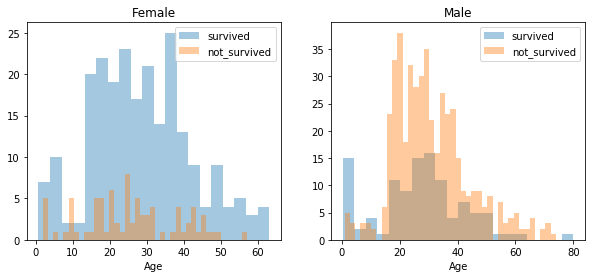

In [236]:
#Age and sex in relation to survival
women=train_df[train_df['Sex']=='female']
men=train_df[train_df['Sex']=='male']
print ('Women and men who survived',women.shape[0],men.shape[0])

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.distplot(women[women['Survived']==1].Age, bins=20, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

#These plots indicate that women between 20-40 had a greater rate of survival than the men in this age group  
#it is evident than infants were also given priority in the resuce efforts

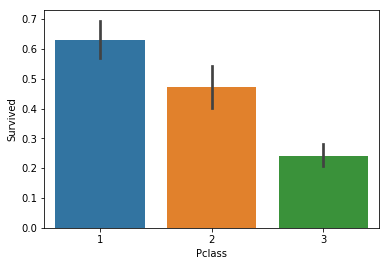

In [237]:
#Passenger class plot below incicades that Pclass 1,2,3 had decreasing rates of survival in that order. 
sns.barplot(x='Pclass', y='Survived', data=train_df)


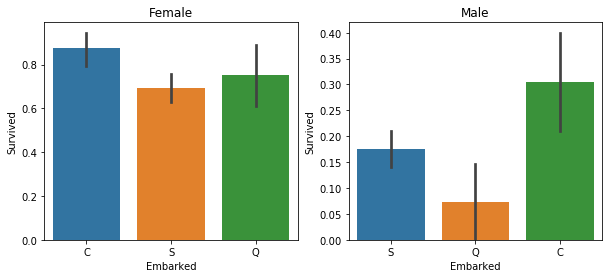

In [238]:
#Port embarked by passengers plot below incicades that men from ports S and Q had much lower survival rate than port C.
#survival rate was evenly distributed among women, although port C again showed the best survival rate 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

ax=sns.barplot(x='Embarked', y='Survived', data=train_df[train_df['Sex']=='female'],ax=axes[0])
ax.set_title('Female')

ax=sns.barplot(x='Embarked', y='Survived', data=train_df[train_df['Sex']=='male'],ax=axes[1])
ax.set_title('Male')


## Converting features
In the dataset, we have Fare as float and we have 4 categorical features: Name, Sex, Ticket and Embarked.

We want features to be uniform in range as well as of the same type for applying the machine learning techniques 

In [239]:
#Sex - lets convert female - 1 and male - 0
gender={"male":0,"female":1}

data=[train_df,test_df]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(gender)
train_df['Sex'].describe()


count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [240]:
#Embarked - Since there are only 3 ports, lets convert them to numeric

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
train_df['Embarked'].describe()


count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [241]:
#Ticket: do we want to keep this?
train_df['Ticket'].describe()
#this column has 681 different values and the highest frequency is 7, it will be tricky to make it useful so we will drop it 

train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

In [242]:
#the only other categorical feature remaining is Name. Name isnt very useful as well, since we already have 
#sex as well as age for all passengers. so we will drop it
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)


In [243]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [244]:
#we can further simplify the features by converting Fare and Age from float to int
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

In [245]:
#it is common to make the age feaure into groups to avoid many distinct values. we can make agegroups aking sure the 
#passengers are roughly evenly split among the groups. Later we can see how the SGD classifier performed

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed
train_df['Age'].value_counts()

6    163
4    163
5    144
3    133
2    121
1     99
0     68
Name: Age, dtype: int64

In [246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
dtypes: int32(2), int64(6)
memory usage: 48.8 KB


## Building ML Models


In [247]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()

In [248]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

54.55 %


In [249]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")


73.18 %


In [250]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.49 %


In [251]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

80.02 %


In [252]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.19 %


In [253]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

79.35 %


In [254]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

76.43 %


## Comparison of performance

In [255]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Stochastic Gradient Decent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.49,Random Forest
85.19,KNN
80.02,Logistic Regression
79.35,Naive Bayes
76.43,Support Vector Machines
73.18,Stochastic Gradient Decent
